# Представљање низова података

## Дескриптивна статистика

Дескриптивна статистика је стручни назив за низ различитих мера којима описујемо одређени скуп података. Замислимо скуп у ком су записани бројеви ципела свих ученика у једном одељењу. Ми ћемо, једноставности ради, унети измишљене податке за једно мање одељење. Ви можете лако да унесете праве вредности за ваше одељење.

In [1]:
bc=[42,44,37,41,38,38,43,38,39,47,43,37,36,44,45,40,39,43,39,43]

Мере којима описујемо овакав скуп података углавном се тичу интервала вредности, просека и растура. Број елемената низа, минимум и максимум описују интервал у ком се налазе записане вредности. За описивање просека или типичне вредности најчешће узимамо средњу вредност (аритметичку средину) или медијану. За описивање растура, тј. очекиваног одступања појединачних вредности од просека користимо максимално апсолутно одступање или стандардну девијацију.

Све ове мере посебно су важне код мерења. У природним наукама се скуп измерених вредности $\{x_1,x_2,x_3...x_n\}$ најчешће приказује као $\bar{x}\pm\sigma_x$ при чему је $\bar{x}$ средња вредност за цео скуп, док је $\sigma_x$ стандардна девијација овог скупа измерених вредности. 

### Мере за описивање просека

Пајтон у стандардној библиотеци има функције за број елемената, минимум и максимум, али нема функције за рачунање средње вредности или медијане. Ваш први задатак ће бити да напишете функције које то раде. Пошто ћемо све функције које су постављене као задаци у овој лекцији одмах примењивати, решења су дата одмах испод задатака. Ако не морате, немојте гледати у решења. Слободно решите задатак на други начин.

> __Средња вредност__ или аритметичка средина рачуна се као збир свих вредности у низу подељен са дужином низа. Аритметичка средина се рачуна по формули $$\bar{x}=\frac{\sum_{k=1}^{n}x_k}{n}.$$ Ова формула је само формални математички начин да запишемо да треба сабрати све вредности у низу и тај збир поделити са бројем елемената низа.

__Задатак 1__: Напишите функцију која враћа средњу вредност низа бројева.

In [2]:
def sr_vred(L):
    m=sum(L)/len(L)
    return m

> __Медијана__ је вредност средишњег елемента сортираног низа. Ако је број елемената у низу непаран, онда је то баш вредност средишњег елемента. Ако је број елемената паран, онда је медијана средња вредност за пар елемената у средини.

__Задатак 2__: Напишите функцију која враћа медијану низа бројева.

In [3]:
def medijana(L):
    n=len(L)          # ne je broj elemenata niza
    L.sort()          # prvo sortiramo niz
    if n%2==1:        # onda proverimo da li je n neparan broj
        md=L[n//2]    # ako jeste, središte ima indeks n//2 (proverite sami)
    else:                         # ako je paran
        md=(L[n//2-1]+L[n//2])/2  # onda uzimamo srednju vrednost dva elementa najbliža središtu
    return md

Да видимо сада колико износе средња вредност и медијана низа бројева у листи `bc`.

In [4]:
print("srednja vrednost:",sr_vred(bc),"  medijana:",medijana(bc))

srednja vrednost: 40.8   medijana: 40.5


### Мере за описивање растура

За описивање низа бројева сем просечне вредности потребно нам је да знамо и колико појединачне вредности одступају од тог просека. Други назив за одступање од просека је __девијација__. Постоје различите мере одступања. Најједноставнија је __максимална апсолутна девијација__. Јасно вам је да девијације могу да буду позитивне и негативне у зависности да ли је вредност већа или мања од просека. За меру растура свеједно је да ли је одступање са доње или горње стране. Зато нас интересује апсолутна вредност одступања.

__Задатак 3__: Напишите функцију која враћа, по апсолутној вредности, највеће одступање од средње вредности.

In [5]:
def mad(L):
    m=sr_vred(L)               # prvo nalazimo srednju vrednost niza
    d=[abs(x-m) for x in L]    # za svaku vrednost u nizu računamo apsolutno odstupanje, |x-m| 
    mo=max(d)                  # sad uzimamo maksimalnu vrednost odstupanja
    return mo

In [6]:
mad(bc)

6.200000000000003

Статистичари кажу да је __стандардна девијација__ боља мера растура. Зашто је то тако нећемо објашњавати у приручнику за Пајтон, боље погледајте уџбеник статистике или обраде резултата мерења. Нама је овде важније да знамо да је израчунамо. Не дајте да вас обесхрабри рогобатна формула. Она се лако претвара у алгоритам. 

> __Стандардна девијација__ се рачуна као квадратни корен средњег квадратног одступања, тј. као $$\sigma_x=\sqrt{\frac{1}{n-1}\sum_{k=1}^{n}{(x_k-\bar{x})^{2}}}.$$ Ова формула значи да сабирамо квадрате одступања за све елементе низа, да тај збир онда делимо са $n-1$ и да, коначно, из тог количника вадимо квадратни корен.

__Задатак 4__: Напишите функцију која враћа стандардну девијацију низа бројева.

In [7]:
def std(L):
    m=sr_vred(L)
    n=len(L)
    ko=[(x-m)**2 for x in L]    # **2 je dizanje broja na drugi stepen, tj. kvadriranje
    sko=sum(ko)/(n-1)           # zbir svih kvadrata odstupanja delimo sa n-1
    std=sko**0.5                # **0.5 je dizanje na stepen 0.5 što je isto što i korenovanje
    return std

In [8]:
std(bc)

3.1051739505473597

Коначно, имамо и средњу вредност и стандардну девијацију па низ бројева ципела можемо да прикажемо онако како би то научници урадили: као средња вредност ± стандардна девијација. 

In [9]:
print(round(sr_vred(bc),1),"±",round(std(bc),1)) # round(...,1) zaokružuje broj na jednu decimalu

40.8 ± 3.1


На крају ове приче о дескриптивној статистици треба да знате да ове и сличне функције већ постоје у библиотекама као што су _pandas_ или _numpy_, нпр. `pd.mean()`, `pd.median()` или `pd.std()`. Да бисмо користили _pandas_ функције потребно је да увеземо библиотеку и листу претворимо у серију бројева. Овде није била идеја да само применимо функције већ да пробате сами да их испрограмирате.

### Фреквенцијска анализа

За било који нумерички или знаковни низ можемо да урадимо статистику појављивања појединачних вредности. Кад бројеви узимају вредности само из мањег скупа тачно одређених вредности, фреквенцијска анализа има више смисла. Бројеви ципела за ученике једног одељења, управо је пример таквог (дискретног) скупа вредности. 

Овде ћемо показати како распон од најмањег до највећег познатог броја ципела можемо да претворимо у интервал целих бројева за које пребројавамо колико су се пута појавили.

In [10]:
mn=min(bc)
mx=max(bc)
interval=list(range(mn,mx+1))        # prvo pravimo 'range' od mn do mx pa ga pretvaramo u listu 
bp=[]                                # lista sa brojem pojavljivanja je na početku prazna
for i in interval:                   # za svaki broj iz intervala
    broj_pojavljivanja=bc.count(i)   # prebrojavamo koliko se puta pojavljuje
    bp.append(broj_pojavljivanja)    # taj broj dodajemo listi bp
    print(i,broj_pojavljivanja)

36 1
37 2
38 3
39 3
40 1
41 1
42 1
43 4
44 2
45 1
46 0
47 1


Одавде видимо који су бројеви ципела чешћи од других. Ципеле број 43 има највећи број ученика. То би могла да буде корисна информација трговцима који набављају ципеле за средњошколце. Мера која нам даје вредност променљиве која се у узорку појављује највећи број пута, назива се __мод__. Пајтон у стандардној библиотеци нема ову функцију, али је библиотеке за анализу података имају. Да ли бисте могли да напишете функцију која враћа мод? Имајте у виду да различите вредности могу да имају исти број појављивања. Тада низ података има више модова.

Из табеларног приказа није сасвим лако видети расподелу фреквенција. Боље би било да их прикажемо графички. Ево како су такав задатак решавали људи пре педесет година кад су рачунске машине штампале само карактере. Једноставно, за сваку вредност приказивали један исти карактер онолико пута колико колика им је фреквенција. Најлакше је било да за сваку вредност карактере прикажу у посебном реду.  

In [11]:
for i in range(len(interval)):
    print(interval[i],"#"*bp[i])

36 #
37 ##
38 ###
39 ###
40 #
41 #
42 #
43 ####
44 ##
45 #
46 
47 #


Видите ли да овде не постоји једна доминантна вредност око које се остале гомилају? Изггледа као да ова раподела има два "пика" или мода: један за величине 38-39, а други за 43. Истина, ципеле број 43 се најчешће појављују, али не знамо да ли би тако остало и да имамо већи узорак, тј. да смо прикупили податке од свих ученика једног разреда. На овој раподели видимо два брдашца или брега. Расподеле које изгледају као два одвојена брега називамо бимодалним. Биће да овде имамо преклопљене две расподеле и да један мод одговара женским, а други мушким ципелама. То би, такође, могла да буде корисна информација трговцима који набављају обућу за средњошколце.  

Ово је била претеча графичког приказивања фреквенција одређених вредности података. Тако су људи и руком на папиру радили. Ми данас не морамо тако. Имамо на располагању много бољу хардвер. Пајтон има функције које то могу да искористе.

## Графичко представљање низова података

Велику количину података није лако представити. Због тога се подаци организују у табеле, групишу и пребројавају. Зато се раде обрада и анализа података. Да би овај процес био једноставнији и разумљивији потребно је да "видимо" податаке. Графичко представљање података постоји већ вековима, али никада није било тако важно као данас када је количина података са којом се срећемо неупоредиво већа него раније. Графичко приказивање података, или __визуелизација__, има задатак да верно прикаже податке и истакне оно што сматрамо најважнијим. Иако ова два захтева могу да буду супротстављена, добра визуелизација мора да испуни оба.

Да бисмо податке графички приказали у Пајтону потребно је да их организујемо у низове или табеле.

### Коришћење библиотеке `matplotlib.pyplot` за визуелизацију

Стандардна Пајтонова библиотека нема функције за цртање графика. Зато је неопходно да увеземо неку која те функције има. Најчешће се за визуелизацију увози библиотека `matplotlib.pyplot`. Због тога многи Пајтон програми на самом почетку имају `import matplotlib.pyplot as plt`, што значи да одмах увозимо тражену библиотеку компликованог имена уз напомену да ћемо је убудуће позивати преко скраћеног имена `plt`. 

In [12]:
import matplotlib.pyplot as plt

Ова библиотека има огроман број различитих функција и опција за приказивање резултата. (Пробајте `dir(plt)` да видите шта све у библиотеци постоји.) Ми ћемо овде приказати само неколико најчешће коришћених.

### Линијски, тачкасти и стубичасти дијаграми

Екран рачунара, као и папир на ком цртамо графиконе, има две димензије које користимо за потребе визуелизације. Где год да ставимо тачку, она име две координате: _x_ по хоризонтали и _y_ по вертикали. Како год да приказујемо податке, морамо да их сведемо на две димензије и да цео графикон прикажемо као скуп тачака у равни. Због тога су најједноставнији они графикони где низ тачака одређују два низа координата, један за _x_, други за _y_-осу.

У следећем примеру ћемо помоћу функције `scatter()` приказати __тачкасти дијаграм__, односно тачке одређене са два низа координата: `x=[3,4,5]` и `y=[4,2,1]`. Приметите како за низове координата користимо листе. Тако је најједноставније.

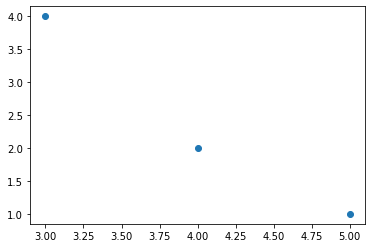

In [13]:
x=[3,4,5]
y=[4,2,1]
plt.scatter(x,y)

Вероватно примећујете да координатни систем не почиње од нуле. Функција сама подешава границе тако да максимално искорити простор који је на располагању. То можете да промените сами помоћу функција `xlim()` и `ylim()`. Ставите, на пример,
```
plt.xlim([0,6])
plt.ylim([0,6])
```
одмах после линије у којој је `scatter()` функција.

> Напомена: Осим што цртају график, графичке функције, као и било које друге функције, врећају одговарајућу вредност. У претходном примеру смо видели да је изнад графика исписан текст `<matplotlib.collections.PathCollection at 0x1866f81a460>`. Та нам вредност као повратна информација углавном није потребна, а често квари изглед графика. Ако желимо да функција не исписује ту вредност, на крају реда који исцртава график ставите тачка-зарез `;`. У наредним примерима ћемо овако завршавати ове линије кода како не би било непотребног исписа.

Претходни пример је вероватно превише једноставан па ћемо дати још један. Ми у пракси ретко кад укуцавамо све вредности које треба приказати на графику. Податке за график или учитавамо из неког фајла или их рачунамо. Овде ћемо дати пример са рачунањем вредности. Конкретно, узећемо све целобројне вредности од -5 до 5 за _x_ координату, а њихове квадрате за _y_ координату.

Начин на који записујемо све бројаве од -5 до 5 вам је можда необичан, али не желимо да куцамо свих 11 бројева. Зато користимо колекцију типа `range` која даје све те бројеве, да би је потом претворили у листу помоћу функције `list()`. За другу координату рачунамо вредности користећи _list comprehension_ конструкцију. Унутар угластих заграда пише да у листу уносимо квадрате броја `t` за свако `t` из листе `x`. На крају прикажемо податке на графику као што смо радили и у претходном примеру. 

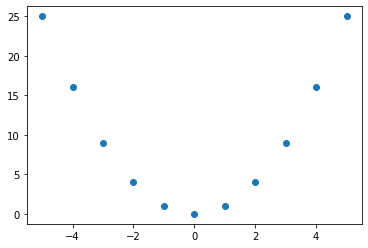

In [14]:
x=list(range(-5,6))
y=[t**2 for t in x]
plt.scatter(x,y);

> Ако желите да се на графику појави мрежа хоризонталних и вертикалних линија за вредности које су већ означене на _x_ и _y_ оси, после линије која исцртава график додајте линију која црта мрежу: `plt.grid()`.

Тачкасти дијаграми су стандарни начин приказа података који су добијени мерењем. Ипак, често се уместо тачкастих користе __линијски дијаграми__ који суседне тачке у низу повезују правим линијама, односно дужима. За овај тип дијаграма користимо функцију `plot()`. Да видимо сад исте оне податке од малопре на линијском дијаграму. 

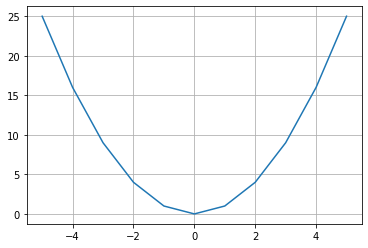

In [15]:
x=list(range(-5,6))
y=[t**2 for t in x]
plt.plot(x,y)
plt.grid()

Овако смо добили изломљену криву линију која личи на параболу. Ако хоћете да буде мање изломљена, узмите више тачака из интервала од -5 до 5.

Некад имамо само један низ података који хоћемо да прикажемо графички. На пример, број поена који је дао Стеф Кари у финалној серији НБА лиге: 34, 29, 31, 43, 16, 34. Како да прикажемо ове податке кад имамо само једну координату? Истина је, заправо, да имамо и другу, само што није експлицитно наведена. То је редни број утакмице. Пошто података о броју поена има шест, онда су одговарајуће вредности за _x_-координату бројеви од 1 до 6. 

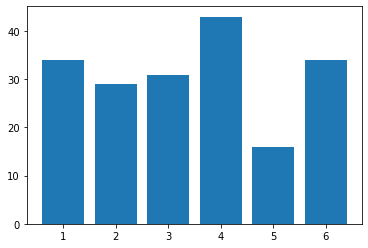

In [16]:
pts=[34,29,31,43,16,34]
plt.bar([1,2,3,4,5,6],pts);

За разлику од тачкастих и линијских дијаграма где вредности за _x_ и _y_ координате могу да имају било које нецелобројне вредности, __стубичасте дијаграме__ обично користимо за податке који на _x_-оси имају узастопне целобројне вредности, редне бројеве или чак стрингове као називе категорија. Идеја стубичастог дијагарама је да омогући лако поређење између вредности у низу. То се најбоље види ако су вредности на _x_-оси еквидистантне (тј. да су растојања између суседних стубића иста). Због тога су редни бројеви или називи категорија идеални.

__Задатак 5__: Прикажите стубичасти дијаграм за фреквенције одређених бројева ципела садржаних у листи `bc`.

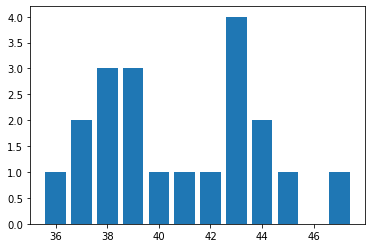

In [17]:
plt.bar(interval,bp);

Стубучни дијаграм је намењен независно променљивим које имају дискретне, тј. унпред утврђене фиксне вредности. То не морају да буду само нумеричке већ и номиналне променљиве.

У листи која следи наведена су имена свих победника Вимблдона у мушкој конкуренцији у "опен ери", тј. од 1968. до 2022. године. Можете ли да прикажете фреквенције победника помоћу стубичног дијаграма?

In [18]:
ww=["Rod Laver", "Rod Laver", "John Newcombe", "John Newcombe", "Stan Smith", "Jan Kodeš", "Jimmy Connors", 
    "Arthur Ashe", "Björn Borg", "Björn Borg", "Björn Borg", "Björn Borg", "Björn Borg", "John McEnroe",
    "Jimmy Connors", "John McEnroe", "John McEnroe", "Boris Becker", "Boris Becker", "Pat Cash", "Stefan Edberg",
    "Boris Becker", "Stefan Edberg", "Michael Stich", "Andre Agassi", "Pete Sampras", "Pete Sampras",
    "Pete Sampras", "Richard Krajicek", "Pete Sampras", "Pete Sampras", "Pete Sampras", "Pete Sampras",
    "Goran Ivanišević", "Lleyton Hewitt", "Rodger Federer", "Rodger Federer", "Rodger Federer", "Rodger Federer",
    "Rodger Federer", "Rafael Nadal", "Rodger Federer", "Rafael Nadal", "Novak Đoković", "Rodger Federer",
    "Andy Murray", "Novak Đoković", "Novak Đoković", "Andy Murray", "Rodger Federer", "Novak Đoković",
    "Novak Đoković", "", "Novak Đoković", "Novak Đoković"]

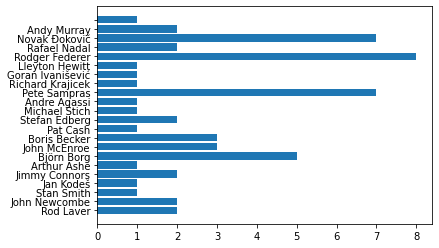

In [19]:
ji=[]                               # lista jedinstvenih imena
bpw=[]                              # lista broja pojavljivanja u ji listi
for x in ww:                        # za svaki element liste ww
    if x not in ji:                 # ako ime nije već u listi jedinstvenih imena
        ji.append(x)                # dodaj ga u listu
        broj_pobeda=ww.count(x)     # prebroj koliko se puta pojavljuje u listi ww
        bpw.append(broj_pobeda)     # dodaj broj pobeda u listu bpw za to jedinstveno ime
plt.barh(ji,bpw);                   # nacrtaj (horizonatlni) stubični dijagram za ji i bpw

Због прегледности дигаграма, тачније имена тенисера, овде смо нацртали хоризонтални стубичасти (или тракасти) дијаграм. Само смо уместо функције `.bar()` користили `.barh()`.

Тумачење овог дијаграма можете да урадите сами. У јулу 2022. године, Федерер (још увек) има највећи број освојених Вимблдона. Ажурирајте ове податке ако се нешто значајно промени у будућности. 

__Секторски дијаграми__ (или "питице") могу да прикажу исте ове податке. Они површину круга деле на делове (секторе) чије су површине сразмерне вредностима у низу. Овај тип дијаграма се сматра атрактивним иако има лошу прегледност и слабе могућности поређења вредности у низу. Секторске дијаграме не би требало користити када је потребно да се лако упореде вредности у низу или да се уочи тренд промене. Ови дијаграми имају највише смисла када приказују удео одређених вредности у укупном броју.

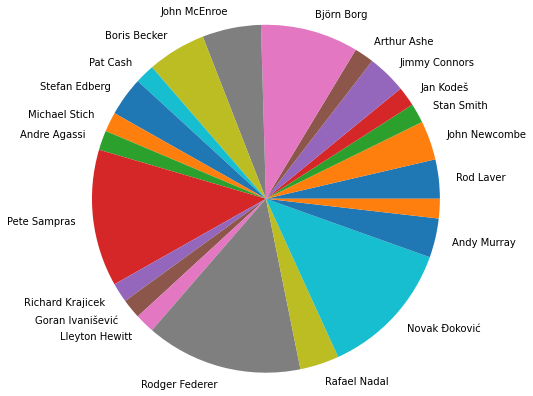

In [20]:
plt.pie(bpw,labels=ji,radius=2);

### Хистограм

__Хистограм__ је графички приказ расподеле бројачаних података у одређеном скупу. Идеја хистограма је да се распон од најмањег до највећег броја у скупу подели на интервале исте ширине, да се преброји колико бројева упада у који од тих интервала и да се, коначно, резултат тог пребројавања прикаже као стубичасти дијаграм по тим интервалима.

Иако хистограм изгледа као стубичасти дијаграм, постоје разлике. Док се стубичасти дијаграм приказује за низ бројева на _x_-оси, код хистограма се стубићи придружују интервалима. Осим тога, хистограм пре приказивања ради статистичку обраду података, односно дељење на интервале и пребројавање одговарајућих вредности.

Да бисмо добили неке случајне вредности бројева које треба приказати на хистограму, прво ћемо генерисати један таквих бројева помоћу функције `random()` из `random` библиотеке. Ова функција даје случајан број између 0 и 1. Ако 100 пута генеришемо случајан број на овај начин и све их ставимо у листу, добићемо низ од 100 независно добијених случајних бројева.   

In [21]:
import random                             # prvo uvozimo biblioteku
rb=[random.random() for i in range(100)]  # za pravljenje liste koristimo list comprehension
print(rb[0:6])                            # prikazujemo prvih nekoliko brojeva iz liste

[0.9374688651656592, 0.39005112156918265, 0.24945929605721617, 0.1909883868014295, 0.26138954555274296, 0.3347919695157744]


Да не бисмо штампали вредности свих сто елемената листе, боље да их прикажемо као хистограм. За то користимо функцију `hist()` која има само један аргумент: назив листе. 

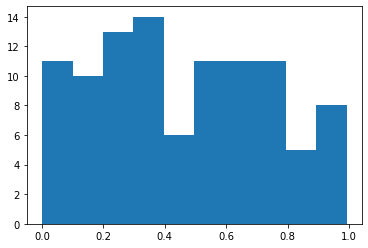

In [22]:
plt.hist(rb);

Добили смо хистограм. Додуше, ако хоћемо да будемо цепидлаке, он није најпрегледнији јер не знамо где су тачно границе интервала и колике су за њих вредности стубића. То можемо још мало да средимо. Прво ћемо да кажемо функцији `hist()` да не дели интервал од најмање до највеће вредности на подинтервале, него да то уради за интервал од 0 до 1. То радимо тако што функцији уз аргумент који смо већ унели, саопштимо и да су границе тог великог интервала (_range_) 0 и 1. Онда ће границе подинтервала бити тачно на 0, 0.1, 0.2, итд. Друго, нацртаћемо мрежу (_grid_) преко графика да бисмо боље видели вредности и границе интервала.

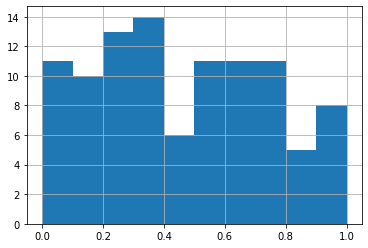

In [23]:
plt.hist(rb,range=(0,1))
plt.grid()

Сада је резулат свакако прегледнији и лакши за читање.